In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [281]:
df_store = pd.read_csv('googleplaystore.csv')
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [282]:
df_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [283]:
df_store.drop(columns=['Current Ver'], inplace=True)
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [284]:
# checking app information and description
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1016.5+ KB


In [285]:
df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [286]:
# dropping duplicates by app name
df_store.drop_duplicates(subset=['App'], inplace=True)

In [287]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9660 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Android Ver     9657 non-null   object 
dtypes: float64(1), object(11)
memory usage: 981.1+ KB


In [288]:
# checking value counts for certain columns
df_store['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: count, dtype: int64

In [289]:
# category of 1.9 is invalid, dropping row
df_store.drop(index=df_store.loc[df_store['Category']=='1.9'].index, inplace=True)

In [290]:
df_store['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [291]:
df_store['Content Rating'].value_counts()

Content Rating
Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [292]:
# category and genres seem to be redundant, dropping genre
df_store.drop(columns=['Genres'], inplace=True)

In [293]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",4.4 and up


(0.0, 5.0)

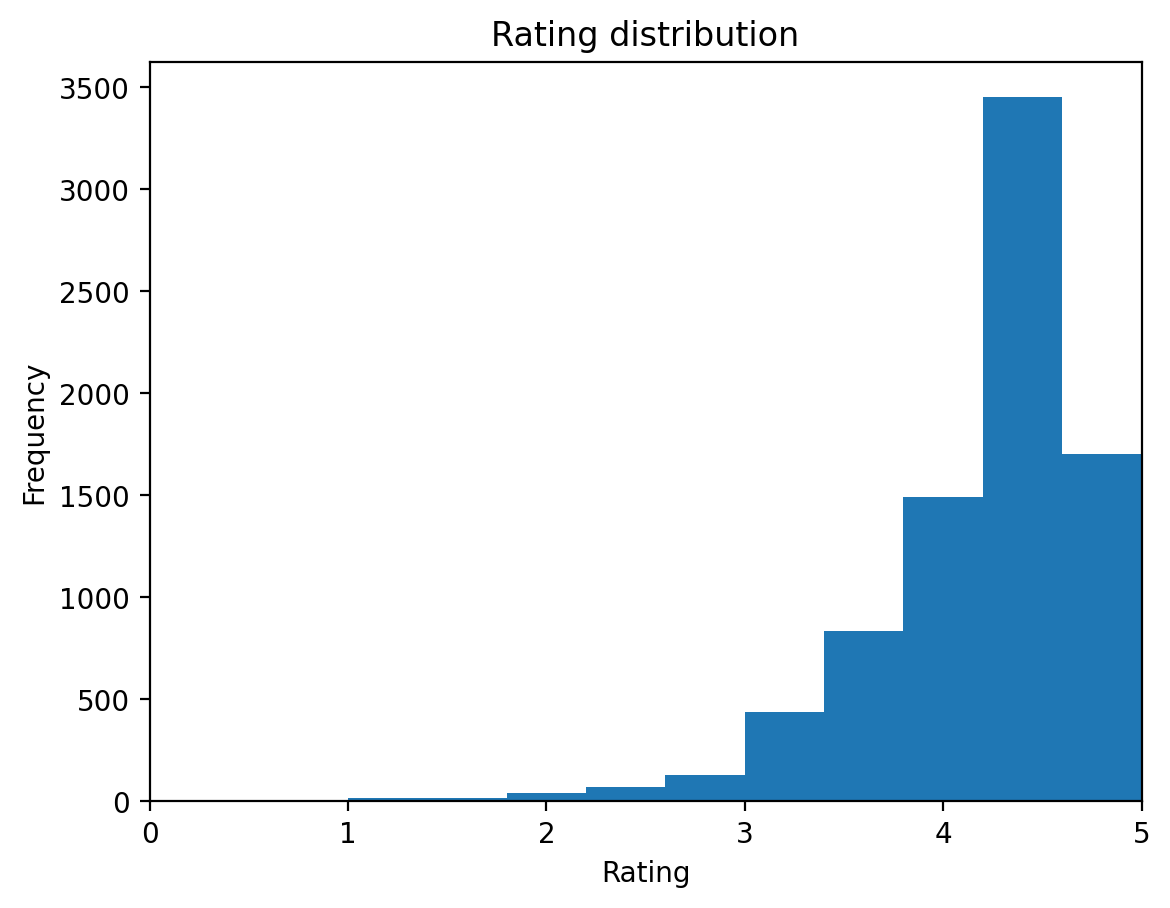

In [294]:
# checking distribution of Rating after initial cleaning
ax1 = df_store['Rating'].plot(kind='hist', xlabel='Rating', bins=10)
ax1.set_title('Rating distribution')
ax1.set_xlim(0, 5)

In [295]:
# observing left skew, which is expected, since rating is capped at 5, and typically rating
# is around 3-5 range

In [296]:
# checking most installed apps
df_store.sort_values(by='Installs', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,"August 2, 2018",4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,"July 19, 2018",4.1 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,Varies with device,"500,000,000+",Free,0,Everyone,"August 4, 2018",Varies with device
3255,SHAREit - Transfer & Share,TOOLS,4.6,7790693,17M,"500,000,000+",Free,0,Everyone,"July 30, 2018",4.1 and up
3235,Google Translate,TOOLS,4.4,5745093,Varies with device,"500,000,000+",Free,0,Everyone,"August 4, 2018",Varies with device


In [297]:
# since multiple apps seem to share installation count, using dense method of ranking
# and checking for most installed apps (rank = 1)
# among these, sorting by reviews first then rating
df_store['Install Rank'] = df_store['Installs'].rank(method='dense', ascending=False)
df_store.loc[df_store['Install Rank'] == 1].sort_values(by=['Reviews', 'Rating'])

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Install Rank
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0,Everyone,"May 25, 2018",4.0 and up,1.0
403,LINE: Free Calls & Messages,COMMUNICATION,4.2,10790289,Varies with device,"500,000,000+",Free,0,Everyone,"July 26, 2018",Varies with device,1.0
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,"July 18, 2018",Varies with device,1.0
3739,Twitter,NEWS_AND_MAGAZINES,4.3,11667403,Varies with device,"500,000,000+",Free,0,Mature 17+,"August 6, 2018",Varies with device,1.0
3755,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284017,Varies with device,"500,000,000+",Free,0,Everyone 10+,"August 3, 2018",Varies with device,1.0
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,"July 19, 2018",4.1 and up,1.0
2550,Snapchat,SOCIAL,4.0,17014787,Varies with device,"500,000,000+",Free,0,Teen,"July 30, 2018",Varies with device,1.0
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40M,"500,000,000+",Free,0,Teen,"August 2, 2018",4.0 and up,1.0
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,"500,000,000+",Free,0,Everyone,"July 31, 2018",Varies with device,1.0
3473,Dropbox,PRODUCTIVITY,4.4,1861310,61M,"500,000,000+",Free,0,Everyone,"August 1, 2018",Varies with device,1.0


In [298]:
# checking statistics in terms of different attributes
# starting with app category
# checking top 5 app categories by mean rating
df_store.groupby('Category')['Rating'].agg(mean_rating='mean').sort_values('mean_rating', ascending=False).head()

,mean_rating
Category,
EVENTS,4.435556
EDUCATION,4.364407
ART_AND_DESIGN,4.357377
BOOKS_AND_REFERENCE,4.344970
PERSONALIZATION,4.332215


In [299]:
# similarly, checking bottom 5 app categories by mean rating
df_store['Reviews'] = pd.to_numeric(df_store['Reviews'])
df_store.info()
# df_store.groupby('Category')['Rating'].agg(mean_rating='mean').sort_values('mean_rating').head()

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Android Ver     9657 non-null   object 
 11  Install Rank    9659 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 981.0+ KB


In [300]:
# checking if there is a relation between number of reviews and overall rating
df_store[['Reviews', 'Rating']].corr()

,Reviews,Rating
Reviews,1.000000,0.055081
Rating,0.055081,1.000000


In [301]:
# does not seem like there is a correlation between rating and review
# checking ratings for different 'type' (free, paid)
df_store.groupby('Type')['Rating'].mean()

Type
Free    4.166372
Paid    4.259603
Name: Rating, dtype: float64

In [302]:
# expecting more free apps compared to paid
df_store.groupby('Type').size()

Type
Free    8902
Paid     756
dtype: int64

In [303]:
# for paid apps, checking if there is a relation between rating and price
df_paid = df_store.loc[df_store['Type']=='Paid'].reset_index()
df_paid['Price'].head()

0    $4.99
1    $4.99
2    $3.99
3    $3.99
4    $6.99
Name: Price, dtype: object

In [304]:
# to compare prices, need to handle the '$'sign
df_paid['Price'].replace('\$', '', regex=True, inplace=True)
df_paid['Price'] = pd.to_numeric(df_paid['Price'])

In [305]:
df_paid[['Price', 'Rating']].corr()

,Price,Rating
Price,1.000000,-0.112617
Rating,-0.112617,1.000000


<Axes: xlabel='Price', ylabel='Rating'>

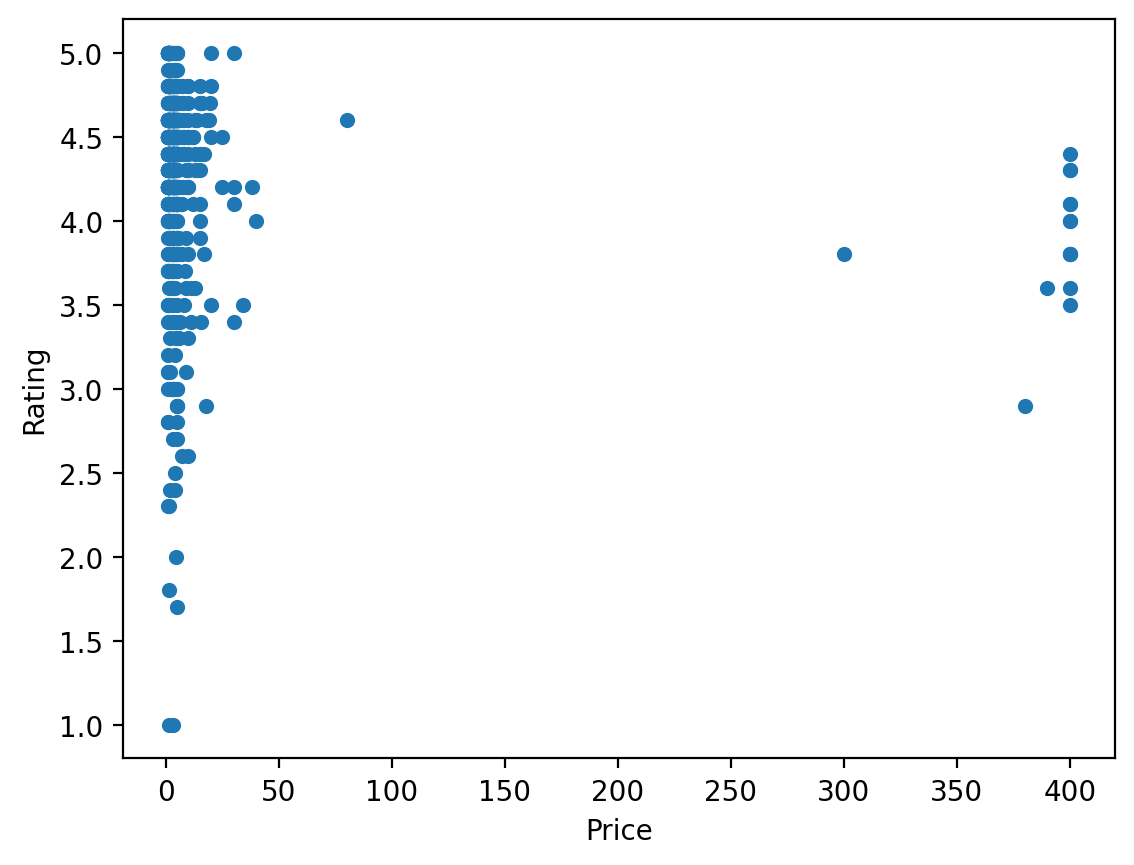

In [306]:
df_paid[['Price', 'Rating']].plot(kind='scatter', x='Price', y='Rating')

<Axes: xlabel='Price', ylabel='Rating'>

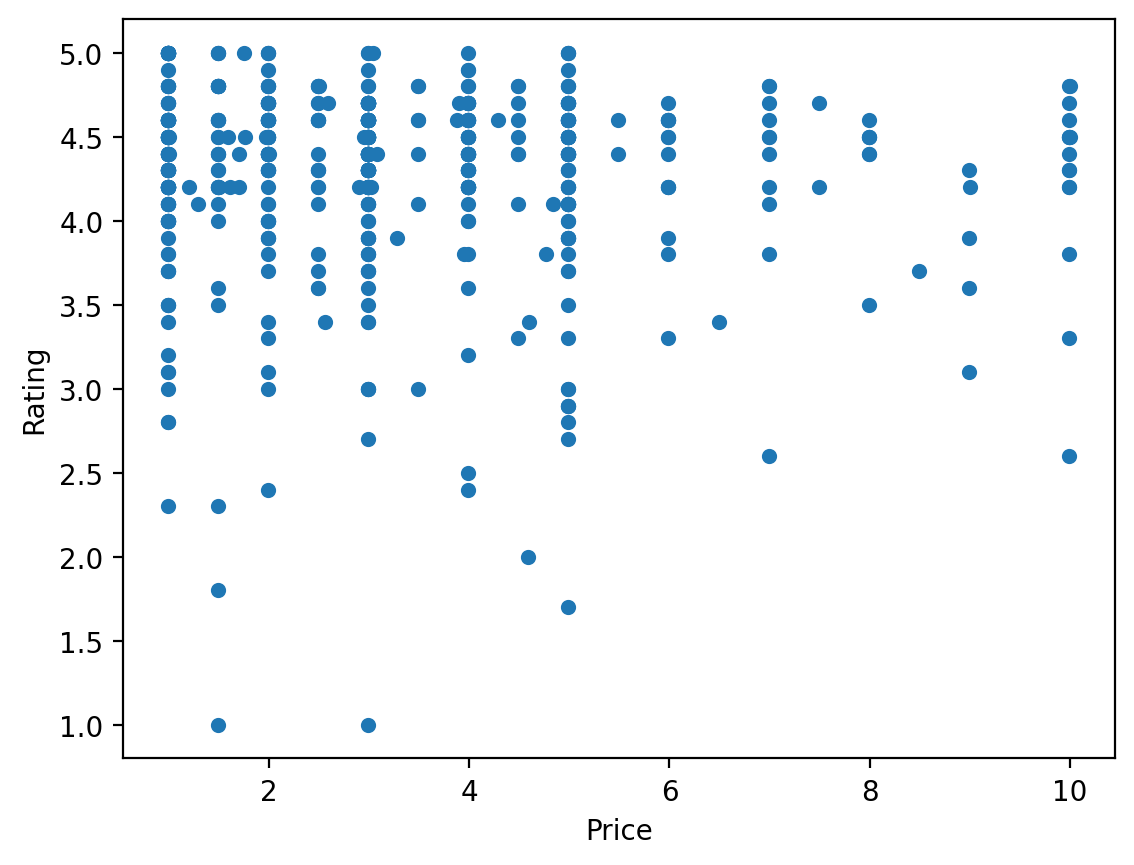

In [307]:
# even though price upto 400$ is valid, removing outliers to better check for relation between price and rating
price_q3 = df_paid['Price'].quantile(0.75)
price_q1 = df_paid['Price'].quantile(0.25)
price_IQR = price_q3 - price_q1
df_paid_no_outlier = df_paid.loc[(df_paid['Price']<=price_q3+1.5*price_IQR) &
                        (df_paid['Price']>=price_q1-1.5*(price_IQR))]
df_paid_no_outlier[['Price', 'Rating']].plot(kind='scatter', x='Price', y='Rating')

In [308]:
# even after removing price outliers, we can say there is not much relation between price and rating for paid apps,
# which is interesting

In [309]:
# checking for apps which have 'earned' the most through installations (excluding in-app purchases)
# even including 'outlier' prices
df_paid.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Install Rank
0,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,"March 25, 2018",4.0 and up,11.0
1,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,"April 11, 2017",3.0 and up,11.0
2,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,"July 5, 2018",4.1 and up,11.0
3,476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,"June 19, 2018",4.1 and up,14.0
4,477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,"October 25, 2017",4.0 and up,18.0


In [310]:
# for calculation and estimation purpose, assigning lower bound as the value
# eg. if Installs is 10000+, assigning it as 10000
df_paid['Installs'].replace('\+|,', '', regex=True, inplace=True)
df_paid['Installs'] = pd.to_numeric(df_paid['Installs'])

In [311]:
df_paid['Earnings'] = df_paid['Installs'] * df_paid['Price']
df_paid.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Install Rank,Earnings
0,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,100000,Paid,4.99,Everyone,"March 25, 2018",4.0 and up,11.0,499000.0
1,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,100000,Paid,4.99,Everyone,"April 11, 2017",3.0 and up,11.0,499000.0
2,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,"July 5, 2018",4.1 and up,11.0,399000.0
3,476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,"June 19, 2018",4.1 and up,14.0,39900.0
4,477,Calculator,DATING,2.6,57,6.2M,1000,Paid,6.99,Everyone,"October 25, 2017",4.0 and up,18.0,6990.0


In [312]:
# checking top 5 earning apps (via installations)
df_paid.sort_values('Earnings', ascending=False).head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Install Rank,Earnings
52,2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,"July 24, 2018",Varies with device,13.0,69900000.0
305,5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,"January 12, 2018",4.0.3 and up,11.0,39999000.0
308,5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,"November 12, 2017",4.0 and up,5.0,19999500.0
141,4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,"July 12, 2018",4.1 and up,13.0,9900000.0
488,7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,"March 21, 2015",3.0 and up,17.0,6990000.0


In [314]:
# checking for earnings on basis of category
df_paid.groupby('Category')['Earnings'].sum().sort_values(ascending=False).head()

Category
FAMILY         1.136798e+08
LIFESTYLE      5.758394e+07
GAME           4.068864e+07
FINANCE        2.572668e+07
PHOTOGRAPHY    8.547768e+06
Name: Earnings, dtype: float64

<Axes: xlabel='Category'>

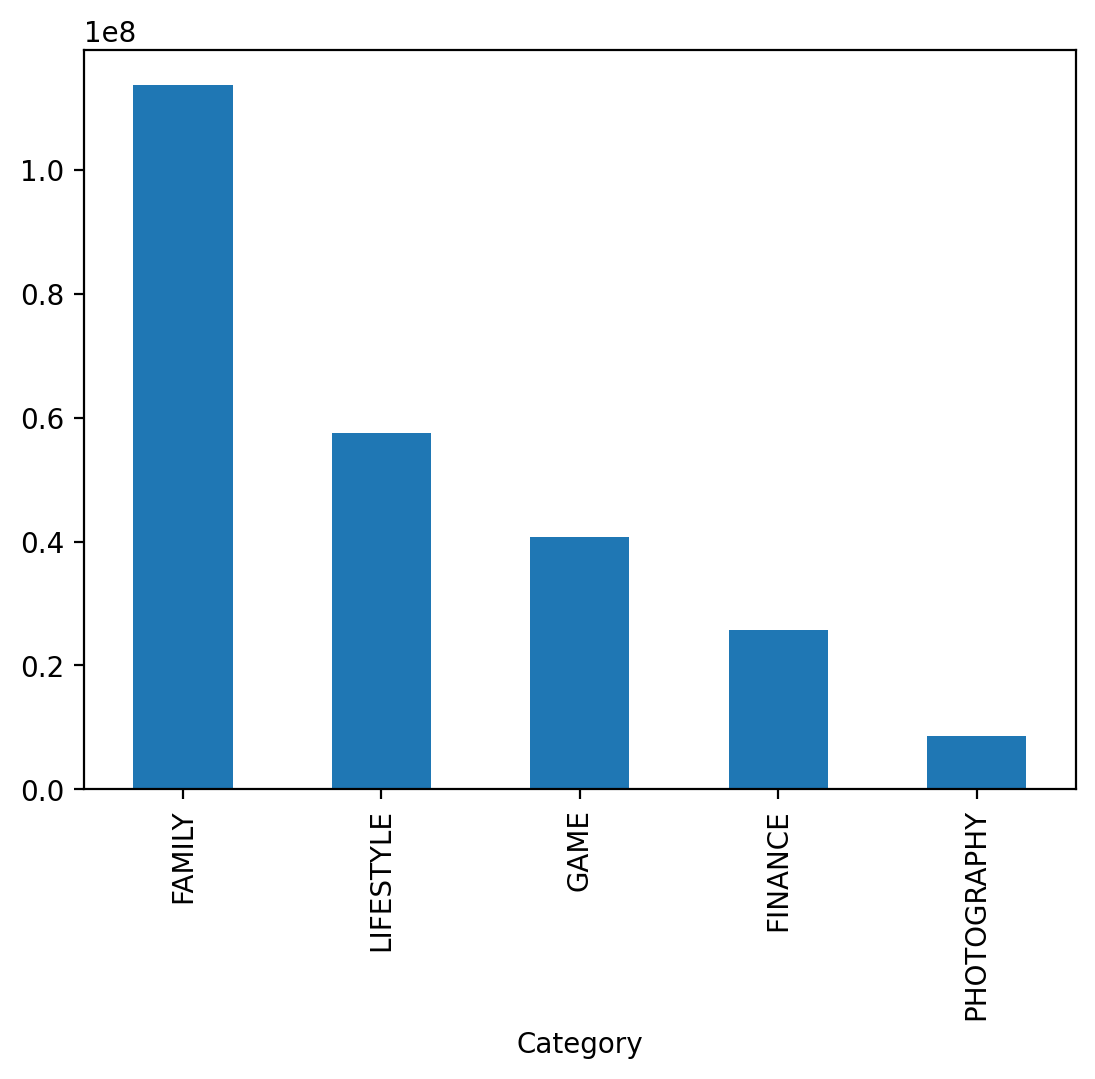

In [315]:
df_paid.groupby('Category')['Earnings'].sum().sort_values(ascending=False).head().plot(kind='bar')